# MIS 284N Assignment 1

Group Member: Rehan Daya, Mauricio Morales, Anqi Lou, Yue Tian, Qinwen Zhou
(all from 8:30-10:30 session)

### Scrape data from forum

Website used:https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans
(Page 1-100)

In [1]:
!pip install selenium
!apt-get -q update
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

import pandas as pd
driver = webdriver.Chrome('chromedriver', options=chrome_options)

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# get all the comments on the first page
comments = pd.DataFrame(columns = ['Date','user_id','comments'])

driver.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")
ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

comment_ids = []
for i in ids:
    comment_ids.append(i.get_attribute('id'))

for x in comment_ids:
    #Extract dates, userid, comment from for each user on a page
    user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text
    
    user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date, userid, comment]

In [3]:
# get all the comments on the second to 100th page
for page in range(2, 101):
    driver.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p" + str(page))
    ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

    comment_ids = []
    for i in ids:
        comment_ids.append(i.get_attribute('id'))

    for x in comment_ids:
        #Extract dates from for each user on a page
        user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        #Extract user ids from each user on a page
        userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
        userid = userid_element.text

        #Extract Message for each user on a page
        user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        #Adding date, userid and comment for each user in a dataframe    
        comments.loc[len(comments)] = [date, userid, comment]  

comments.to_csv("results.csv")

comments.head()

,Date,user_id,comments
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...


### Calculate word frequency

In [4]:
from tempfile import NamedTemporaryFile
import shutil
import csv
import pandas as pd

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from collections import defaultdict
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rehan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# read comments and replace all models with brands
filename = "results_1.csv"
modified_comments = pd.DataFrame(columns = ["comments"])

for item in comments["comments"].values.tolist():

        with open("car_models.csv", "r") as csvfile:
            read = csv.reader(csvfile, delimiter=",", quotechar="|")
            for row2 in read:
                #replace
                item = item.lower().replace(row2[1].lower()," " + row2[0].lower() + " ")
            modified_comments.loc[len(modified_comments)] = [item]

modified_comments.to_csv("modified_comments.csv")

modified_comments.head()

,comments
0,i personally think that with a few tweaks the ...
1,i am debating a new purchase and these two are...
2,"great handling, rwd, excellent engine and the ..."
3,and no manual tranny. that may not matter to y...
4,one beauty of bmw 3 series is that there are s...


In [6]:
# remove stop words

stop = stopwords.words("english")
posts = modified_comments["comments"].tolist()
posts_clean = []
aspi_words = ['want','love','hope','prefer','enjoy','dream','wish']

for post in posts:
    post = re.sub('[%s]' % re.escape(string.punctuation), '', str(post).lower())
    s = []
    for word in post.split():
        if word in aspi_words:
            word = 'aspirational'
        if word not in stop:
            s.append(word)
    posts_clean.append(s)

In [7]:
# get word frequency for each word appeared in the comments
word_freq = {}
word_appeared = []
for post in posts_clean:
    word_appeared = []
    for word in post:
        if word not in word_freq:
            word_freq[word] = 1
        elif word in word_freq and word not in word_appeared:
            word_freq[word] += 1
        word_appeared.append(word)

word_freq_df = pd.DataFrame(columns = ["word", "frequency"])
for key, value in word_freq.items():
    word_freq_df.loc[len(word_freq_df)] = [key, value]

word_freq_df.to_csv("word_freq.csv", index = False)

word_freq_df.sort_values(by = "frequency", ascending = False).head(10)

,word,frequency
60,car,2558
19,hyundai,1574
18,kia,1515
50,toyota,1401
89,bmw,1395
72,like,1253
145,one,1110
71,dont,1068
15,would,1026
197,5,1026


Based on the above frequency table, the top 10 brands are chosen to be:Hyundai, Kia, Toyota, BMW, Pontiac, Acura, Honda, Audi, Infiniti, and Nissan. And the 5 most frequently mentioned attributes of cars are: performance, engine, luxury, price, rwd.

### Calculate Lift Matrix

In [8]:
import csv
from nltk.corpus import stopwords
import re
import string
import decimal
import sys
from collections import defaultdict
import pandas as pd


comments = pd.read_csv('modified_comments.csv')
word_freq = pd.read_csv('word_freq.csv')
stop = stopwords.words('english')
df1 = pd.DataFrame(columns=['nb','nb2','value'])

aspi_words = ['want','love','hope','prefer','enjoy','dream','wish']

#remove blank post and count number of post
comments = comments[pd.notnull(comments['comments'])]
file_length = len(comments.index)
print("Number of non-empty posts:", file_length)

def freq_lookup(w):
    match_word = word_freq[word_freq['word'] == w]
    return match_word['frequency'].iloc[0]


keys_all = []           # Array to store all keys from the ---- edmunds_pair_keys1.txt ---- file

writer_output = csv.writer(open('Lift_Values.csv', 'w'), delimiter=',', lineterminator='\n')


posts = comments["comments"].tolist()[1:]
posts_clean = []

lift_df = []

for post in posts:
    post = re.sub('[%s]' % re.escape(string.punctuation), '', str(post).lower())
    s = []
    for word in post.split():
        if word not in stop:
            if word in aspi_words:
                word = 'aspirational'
            s.append(word)

    posts_clean.append(s)


keys = ['hyundai','kia','toyota','bmw','pontiac','honda','acura','audi','nissan','infiniti','performance','luxury','engine','rwd','price','power','aspirational']
brands = keys[:10]
print(brands)
for index in range(len(keys)):
        nb = keys[index]
        if nb not in brands:
            break
        pair_index = index + 1
        while pair_index < len(keys):
            nb2 = keys[pair_index]
            print ('-------------------' + nb + ' and ' + nb2 + '-------------------')
            pair_index = pair_index + 1

            if nb not in word_freq['word'].values:
                print(nb,"is not present in posts.")
                break
            if nb2 not in word_freq['word'].values:
                print(nb2,"is not present in posts.")
                continue


            #look for the number of post that contains both nb and nb2
            num_nb = freq_lookup(nb).item()
            num_nb2 = freq_lookup(nb2).item()  #.item() is used to convert NumPy value to native Python type

            num_common = 0

            for s in posts_clean:
                if nb in s and nb2 in s:
                    num_common += 1

            print(nb +" " +nb2 +" " + str(num_common))

            if num_common == 0:
                print("These words are not present together in a post")
                continue
            else:
                lift_value = decimal.Decimal(decimal.Decimal(file_length * num_common)/decimal.Decimal(num_nb * num_nb2))

                print('lift('+ nb + "," +nb2 + ')', lift_value)
                lift_df.append([nb, nb2, lift_value])

print ('--------------------------------------------------------')

Number of non-empty posts: 4986
['hyundai', 'kia', 'toyota', 'bmw', 'pontiac', 'honda', 'acura', 'audi', 'nissan', 'infiniti']
-------------------hyundai and kia-------------------
hyundai kia 1504
lift(hyundai,kia) 3.144725552606086529872809390
-------------------hyundai and toyota-------------------
hyundai toyota 628
lift(hyundai,toyota) 1.419936930147008807468254206
-------------------hyundai and bmw-------------------
hyundai bmw 598
lift(hyundai,bmw) 1.357921055867524695659302373
-------------------hyundai and pontiac-------------------
hyundai pontiac 347
lift(hyundai,pontiac) 1.125077545945566322755004233
-------------------hyundai and honda-------------------
hyundai honda 267
lift(hyundai,honda) 1.438405985011539558644296346
-------------------hyundai and acura-------------------
hyundai acura 236
lift(hyundai,acura) 1.269241472743628962145906636
-------------------hyundai and audi-------------------
hyundai audi 158
lift(hyundai,audi) 1.132354378561120470082275897
----------

honda acura 156
lift(honda,acura) 2.245868126537542011711305915
-------------------honda and audi-------------------
honda audi 71
lift(honda,audi) 1.362106381013944039154123188
-------------------honda and nissan-------------------
honda nissan 120
lift(honda,nissan) 2.803170855118907066959015011
-------------------honda and infiniti-------------------
honda infiniti 65
lift(honda,infiniti) 1.424220851131150134472393609
-------------------honda and performance-------------------
honda performance 118
lift(honda,performance) 1.520656286830841759196079648
-------------------honda and luxury-------------------
honda luxury 93
lift(honda,luxury) 1.768166010798938409444495287
-------------------honda and engine-------------------
honda engine 82
lift(honda,engine) 1.617038443284290460370194589
-------------------honda and rwd-------------------
honda rwd 64
lift(honda,rwd) 1.439506306501380393006008770
-------------------honda and price-------------------
honda price 87
lift(honda,price) 1

In [9]:
list_df = pd.DataFrame(lift_df, columns = ['w1','w2','lift'])
list_df.to_csv('Lift_Values.csv', index = False)

df1 = pd.read_csv("Lift_Values.csv")
df2 = pd.read_csv("Lift_Values.csv")
df2 = df2.rename(columns={'w1': 'w2', 'w2': 'placeholder'})
df2 = df2.rename(columns={'placeholder': 'w1'})
frames = [df1, df2]
result = pd.concat(frames)

table_all = pd.pivot_table(result, values='lift', index='w1',columns='w2', fill_value=0.00)

attribute_table = table_all[~table_all.index.isin(brands)]
attribute_table = attribute_table[brands]
attribute_table.to_csv('Attribute_Table.csv')
attribute_table

w2,hyundai,kia,toyota,bmw,pontiac,honda,acura,audi,nissan,infiniti
w1,,,,,,,,,,
aspirational,1.265178,1.271407,1.346219,1.377179,1.427303,1.433170,1.379639,1.418579,1.381845,1.594263
engine,1.311291,1.347050,1.547702,1.404741,1.412330,1.617038,1.673353,1.862601,1.597155,1.528069
luxury,1.512838,1.468446,1.508138,1.330305,1.338778,1.768166,1.954967,1.669318,1.755439,1.762123
performance,1.521279,1.555515,1.411656,1.439455,1.543423,1.520656,1.440884,1.422926,1.440353,1.585990
power,1.367302,1.385257,1.545683,1.571495,1.682883,1.727745,1.747507,1.965778,1.988523,1.519795
price,1.293860,1.297894,1.461984,1.510223,1.773004,1.731748,1.629451,2.091932,1.386451,1.693635
rwd,1.436820,1.449127,1.510403,1.033388,1.516123,1.439506,2.088231,0.987422,1.275182,1.435322


In [10]:
dissimilarity_table = table_all.copy(deep = True)

for i in range(table_all.shape[0] ):
    for j in range(table_all.shape[1]):
        # use this when dissimilarity matrix is needed
        cell_value = dissimilarity_table.iloc[i, j]
        if cell_value != 0:
            dissimilarity_table.iloc[i,j] = 1/cell_value

        if i>=j:
            dissimilarity_table.iloc[i,j] = ""
            table_all.iloc[i,j] = ""

table_all.to_csv('Lift_Matrix.csv')
dissimilarity_table.to_csv('Dissimilarity_Matrix.csv')

In [11]:
table_all

w2,acura,aspirational,audi,bmw,engine,honda,hyundai,infiniti,kia,luxury,nissan,performance,pontiac,power,price,rwd,toyota
w1,,,,,,,,,,,,,,,,,
acura,,1.37964,2.08757,1.48065,1.67335,2.24587,1.26924,2.99672,1.29632,1.95497,2.05217,1.44088,1.69824,1.74751,1.62945,2.08823,1.43201
aspirational,,,1.41858,1.37718,0,1.43317,1.26518,1.59426,1.27141,0,1.38184,0,1.4273,0,0,0,1.34622
audi,,,,1.69815,1.8626,1.36211,1.13235,2.59423,1.13178,1.66932,1.58487,1.42293,1.59336,1.96578,2.09193,0.987422,1.36075
bmw,,,,,1.40474,1.28865,1.35792,2.00413,1.36834,1.33031,1.26032,1.43945,1.48894,1.5715,1.51022,1.03339,1.29855
engine,,,,,,1.61704,1.31129,1.52807,1.34705,0,1.59716,0,1.41233,0,0,0,1.5477
honda,,,,,,,1.43841,1.42422,1.42166,1.76817,2.80317,1.52066,1.44943,1.72775,1.73175,1.43951,1.73102
hyundai,,,,,,,,1.20324,3.14473,1.51284,1.29152,1.52128,1.12508,1.3673,1.29386,1.43682,1.41994
infiniti,,,,,,,,,1.17357,1.76212,2.37799,1.58599,2.87477,1.5198,1.69363,1.43532,1.38861
kia,,,,,,,,,,1.46845,1.26022,1.55551,1.14194,1.38526,1.29789,1.44913,1.40711


In [12]:
dissimilarity_table

w2,acura,aspirational,audi,bmw,engine,honda,hyundai,infiniti,kia,luxury,nissan,performance,pontiac,power,price,rwd,toyota
w1,,,,,,,,,,,,,,,,,
acura,,0.724827,0.479026,0.675379,0.597603,0.445262,0.787872,0.333698,0.771414,0.511518,0.487289,0.694018,0.588846,0.572244,0.613704,0.478874,0.698317
aspirational,,,0.704931,0.726122,0,0.697754,0.790403,0.627249,0.78653,0,0.72367,0,0.700622,0,0,0,0.742821
audi,,,,0.588877,0.536884,0.734157,0.883116,0.38547,0.883566,0.599047,0.630967,0.702777,0.627604,0.508704,0.478027,1.01274,0.734888
bmw,,,,,0.711875,0.776003,0.73642,0.498969,0.730814,0.751707,0.793448,0.694707,0.671618,0.636337,0.662154,0.967691,0.770091
engine,,,,,,0.618414,0.762607,0.654421,0.742363,0,0.626113,0,0.70805,0,0,0,0.646119
honda,,,,,,,0.695214,0.702138,0.703403,0.565558,0.356739,0.657611,0.689927,0.578789,0.577451,0.694683,0.577693
hyundai,,,,,,,,0.831086,0.317993,0.66101,0.774279,0.657342,0.888828,0.731367,0.772881,0.695981,0.704257
infiniti,,,,,,,,,0.852103,0.567497,0.420524,0.630521,0.347854,0.657983,0.590446,0.696708,0.720145
kia,,,,,,,,,,0.680992,0.79351,0.642874,0.8757,0.721888,0.770479,0.690071,0.710676


In [13]:
# get dissimilarity table for brands only
lift_df = []
for index in range(len(brands)):
        nb = brands[index]
        if nb not in brands:
            break
        pair_index = index + 1
        while pair_index < len(brands):
            nb2 = brands[pair_index]
            pair_index = pair_index + 1

            if nb not in word_freq['word'].values:
                break
            if nb2 not in word_freq['word'].values:
                continue

            #look for the number of post that contains both nb and nb2
            num_nb = freq_lookup(nb).item()
            num_nb2 = freq_lookup(nb2).item()  #.item() is used to convert NumPy value to native Python type

            num_common = 0

            for s in posts_clean:
                if nb in s and nb2 in s:
                    num_common += 1


            if num_common == 0:
                continue
            else:
                lift_value = decimal.Decimal(decimal.Decimal(file_length * num_common)/decimal.Decimal(num_nb * num_nb2))

                lift_df.append([nb, nb2, lift_value])

                
list_df = pd.DataFrame(lift_df, columns = ['w1','w2','lift'])
list_df.to_csv('Lift_Values_brands.csv', index = False)

df1 = pd.read_csv("Lift_Values_brands.csv")
df2 = pd.read_csv("Lift_Values_brands.csv")
df2 = df2.rename(columns={'w1': 'w2', 'w2': 'placeholder'})
df2 = df2.rename(columns={'placeholder': 'w1'})
frames = [df1, df2]
result = pd.concat(frames)

table_brands = pd.pivot_table(result, values='lift', index='w1',columns='w2', fill_value=0.00)

dissimilarity_table = table_brands.copy(deep = True)

for i in range(table_brands.shape[0] ):
    for j in range(table_brands.shape[1]):
        # use this when dissimilarity matrix is needed
        cell_value = dissimilarity_table.iloc[i, j]
        if cell_value != 0:
            dissimilarity_table.iloc[i,j] = 1/cell_value

        if i>=j:
            dissimilarity_table.iloc[i,j] = ""
            table_brands.iloc[i,j] = ""

table_brands.to_csv('Lift_Matrix_Brands.csv')
dissimilarity_table.to_csv('Dissimilarity_Matrix_Brands.csv')
dissimilarity_table

w2,acura,audi,bmw,honda,hyundai,infiniti,kia,nissan,pontiac,toyota
w1,,,,,,,,,,
acura,,0.479026,0.675379,0.445262,0.787872,0.333698,0.771414,0.487289,0.588846,0.698317
audi,,,0.588877,0.734157,0.883116,0.38547,0.883566,0.630967,0.627604,0.734888
bmw,,,,0.776003,0.73642,0.498969,0.730814,0.793448,0.671618,0.770091
honda,,,,,0.695214,0.702138,0.703403,0.356739,0.689927,0.577693
hyundai,,,,,,0.831086,0.317993,0.774279,0.888828,0.704257
infiniti,,,,,,,0.852103,0.420524,0.347854,0.720145
kia,,,,,,,,0.79351,0.8757,0.710676
nissan,,,,,,,,,0.560074,0.64967
pontiac,,,,,,,,,,0.786602


### MDS map

In [14]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib.font_manager import FontProperties

In [15]:
new_reader = pd.read_csv('Dissimilarity_Matrix_Brands.csv')
new_reader.index = new_reader["w1"]
del new_reader["w1"]
new_reader
print(new_reader)

          acura      audi       bmw     honda   hyundai  infiniti       kia  \
w1                                                                            
acura       NaN  0.479026  0.675379  0.445262  0.787872  0.333698  0.771414   
audi        NaN       NaN  0.588877  0.734157  0.883116  0.385470  0.883566   
bmw         NaN       NaN       NaN  0.776003  0.736420  0.498969  0.730814   
honda       NaN       NaN       NaN       NaN  0.695214  0.702138  0.703403   
hyundai     NaN       NaN       NaN       NaN       NaN  0.831086  0.317993   
infiniti    NaN       NaN       NaN       NaN       NaN       NaN  0.852103   
kia         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
nissan      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pontiac     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
toyota      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            nissan   pontiac    toyota  
w1        

In [16]:
size = new_reader.shape
print(size)
for j in range(size[1]):
    for i in range(size[0]):
        new_reader.iloc[i,j]=new_reader.iloc[j,i]
        if (i==j):
            new_reader.iloc[i,j]= 0.00


print(new_reader)

(10, 10)
             acura      audi       bmw     honda   hyundai  infiniti  \
w1                                                                     
acura     0.000000  0.479026  0.675379  0.445262  0.787872  0.333698   
audi      0.479026  0.000000  0.588877  0.734157  0.883116  0.385470   
bmw       0.675379  0.588877  0.000000  0.776003  0.736420  0.498969   
honda     0.445262  0.734157  0.776003  0.000000  0.695214  0.702138   
hyundai   0.787872  0.883116  0.736420  0.695214  0.000000  0.831086   
infiniti  0.333698  0.385470  0.498969  0.702138  0.831086  0.000000   
kia       0.771414  0.883566  0.730814  0.703403  0.317993  0.852103   
nissan    0.487289  0.630967  0.793448  0.356739  0.774279  0.420524   
pontiac   0.588846  0.627604  0.671618  0.689927  0.888828  0.347854   
toyota    0.698317  0.734888  0.770091  0.577693  0.704257  0.720145   

               kia    nissan   pontiac    toyota  
w1                                                
acura     0.771414  0.48

In [17]:
adist = np.array(new_reader)
amax = np.amax(adist)
adist /= amax
print(amax)
print(adist)

0.8888276222414113
[[0.         0.53894103 0.75985348 0.50095441 0.88641726 0.37543597
  0.86790087 0.54823837 0.66249708 0.78566113]
 [0.53894103 0.         0.66253277 0.82598361 0.99357371 0.43368401
  0.99408037 0.70988647 0.70610279 0.8268065 ]
 [0.75985348 0.66253277 0.         0.87306355 0.82852942 0.5613783
  0.82222188 0.89269077 0.75562192 0.86641257]
 [0.50095441 0.82598361 0.87306355 0.         0.78216968 0.78996003
  0.79138247 0.40135889 0.77622138 0.6499495 ]
 [0.88641726 0.99357371 0.82852942 0.78216968 0.         0.93503645
  0.35776653 0.87112368 1.         0.79234332]
 [0.37543597 0.43368401 0.5613783  0.78996003 0.93503645 0.
  0.95868227 0.47312181 0.39136251 0.81021884]
 [0.86790087 0.99408037 0.82222188 0.79138247 0.35776653 0.95868227
  0.         0.89275983 0.98523012 0.79956565]
 [0.54823837 0.70988647 0.89269077 0.40135889 0.87112368 0.47312181
  0.89275983 0.         0.63012636 0.73092916]
 [0.66249708 0.70610279 0.75562192 0.77622138 1.         0.39136251
  

C:\Programming\Anaconda\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


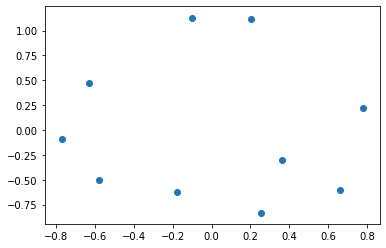

In [18]:
cities1 = new_reader.index

mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=1)
results = mds.fit(adist)

coords = results.embedding_
plt.scatter(coords[:, 0], coords[:, 1], alpha=1)
plt.show()
font0 = FontProperties()
font = font0.copy()

## Change the size of the font
font.set_size('xx-large')

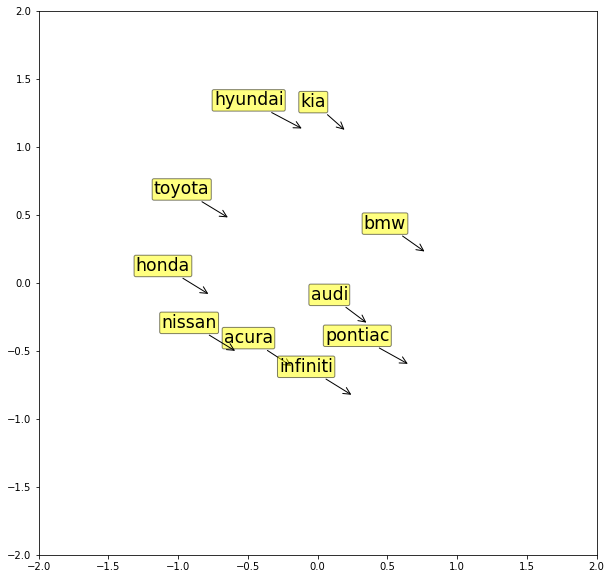

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set(xlim=(-2, 2), ylim=(-2, 2))

for label, x, y in zip(cities1, coords[:, 0], coords[:, 1]):
    ax.annotate(
        label,
        xy = (x, y), xytext = (-20, 20), xycoords='data',
        fontproperties=font,
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0',))


plt.savefig('MDS.png')

**Task A: Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post.
Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available online).**


The 10 most frequently mentioned brands in the “Entry Level Luxury Performance Sedans" forum are Hyundai, Kia, Toyota, BMW, Pontiac, Acura, Honda, Audi, Infiniti, and Nissan.

**Task B: What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)?**

• The distance between Kia and Hyundai is the shortest in the MDS map. This implies that these two brands are mentioned together regularly and their cars might be very similar. A potential reason might be that they are both Korean automakers and their cars have a lot in common such as price range, warranty coverage, etc. With these similarities, customers might switch from one of the brands to another easily. Kia and Hyundai should try to differentiate their products from each other to improve their competitiveness and retain their customers.

• As one of the German luxury performance brands, BMW has the highest average distance between itself and other brands. This implies that among these ten most frequently mentioned brands, BMW is less likely to be mentioned together when people are talking about other brands. We suppose that BMW cars might have some unique features such as design, handling, etc. that successfully differentiate their vehicles from others’, so customers are less likely to switch from BMW to other brands. However, customers also are less likely to switch from other brands to BMW considering some features of BMW such as reliability and price are not that attractive.


**Task C: What are 5 most frequently mentioned attributes of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.**

(Based on Task A, the five most frequently mentioned brands are: Hyundai, Kia, Toyota, BMW, Pontiac)

Performance - Kia, Pontiac, Hyundai, BMW, Toyota

Luxury - Hyundai, Toyota, Kia, Pontiac, BMW

Price - Pontiac, BMW, Toyota, Kia, Hyundai

Power - Pontiac, BMW, Toyota, Kia, Hyundai

RWD - Pontiac, Toyota, Kia, Hyundai, BMW


**Task D: What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive).**

**Product manager**

• Power, price, and RWD are most strongly associated with Pontiac because of the highest lift ratios. The lift ratio between Pontiac and performance is also relatively high. Although Pontiac has gone out of production for almost 10 years, existing automakers can still learn some lessons not only from Pontiac’s failure (since the brand was shut down) but also from its experience of making memorable cars that are powerful rear-wheel drive with high performance.

• BMW is famous for its precise handling and high performance. Its 3-series is also considered to be the benchmarks in this entry-level luxury performance sedan category.
However, as the result shows, the lift ratios between BMW and luxury, performance, power attributes are not the highest among these brands. BMW’s product managers should have realized that other brands like Hyundai, Kia, and Toyota that sell cheaper cars are also making efforts to improve the performance, luxury, and power of their models. For example, Kia released its new model in 2018, Stinger, which is considered to be an entry-level luxury performance car. It has received some good reviews recently, and we can see that the lift ratio between performance and Kia is the highest among the 5 brands. BMW’s product managers should focus on the attributes that would differentiate their products from competitors, such as its unique design, race track heritage, etc.

**Marketing/advertising managers**

• Assuming the sentiment for the price attribute is negative. A potential factor that caused Pontiac’s failure might be that people thought the cars were overpriced since the lift ratio between Pontiac and price is the highest among the 5 brands. BMW should be cautious because among the five most mentioned brands, it has the second-highest lift ratio between its brands and price. The marketing/advertising managers of BMW need to ensure that people are not mentioning the price of a BMW car because they think it’s overpriced. In the marketing/advertising campaigns, the manager should be emphasizing the perspective that although the price tag of a BMW car might be higher compared to its competitors’, it comes with better handling and performance, which is considered to be worth every penny the customer will spend on it.


**Task E: Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?**

To find the most aspirational brands in the data, we switched keywords including “want”, “buy”, “hope”,” dream”,” wish”, “love”, etc. to “aspirational” in the text file we extracted and calculated the lift values between these ten brands and the word “aspirational”. The brand that has the highest lift ratio is Infinity. Infinity is the luxury vehicle division of Nissan which is known for its reliability and good fuel efficiency. This implies that when considering a performance sedan, attributes like performance, power, and luxury might not be the only concern. Reliability and fuel efficiency are also important factors that people take account of. After all, no one wants his/her car to break down regularly. Car manufacturers should be aware of this problem to ensure their cars have good qualities that meet customers’ expectations of reliability.